Github portfolio: https://github.com/olivfwm/Project-Portfolio/tree/main

Formal paper for code below: https://github.com/olivfwm/Project-Portfolio/blob/main/ML-For_Biost/alzheimer-paper.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/UW/AD_360_training.csv')
target = 'Outcome'
features = data.columns[1:]
train_data, test_data = train_test_split(data, test_size = 0.2)

Mounted at /content/drive


In [3]:
def visualize_confusion_matrix(test, pred, score):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

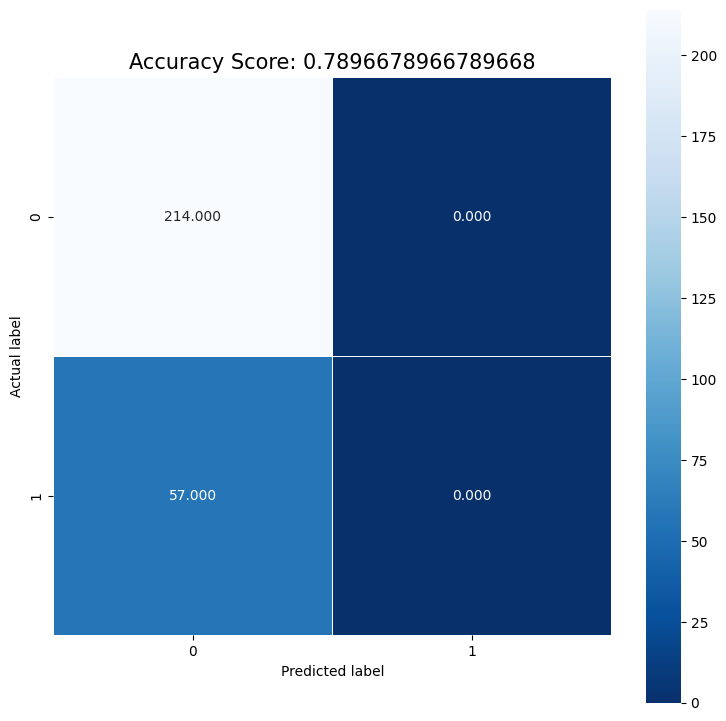

In [4]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(train_data[features], train_data[target])
dt_y_pred = dt.predict(train_data[features])
dt_score = dt.score(train_data[features], train_data[target])
visualize_confusion_matrix(train_data[target], dt_y_pred, dt_score)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [7]:
model = DecisionTreeClassifier()
hyperparameters = {
    'min_samples_leaf': np.linspace(1, 50, num=6).astype(int).tolist(),
    'max_depth': [3, 4, 5, 7, 10, 15, 20]
}

search = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5, return_train_score=True)

search.fit(data[features], data[target])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 10, 20, 30, 40, 50]},
             return_train_score=True)

In [8]:
print(search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 50}


In [9]:
def plot_scores(ax, title, search, hyperparameters, score_key):
    # Get results from GridSearch and turn scores into matrix
    cv_results = search.cv_results_
    scores = cv_results[score_key]
    scores = scores.reshape((len(hyperparameters['max_depth']), len(hyperparameters['min_samples_leaf'])))
    max_depths = cv_results['param_max_depth'].reshape(scores.shape).data.astype(int)
    min_samples_leafs = cv_results['param_min_samples_leaf'].reshape(scores.shape).data.astype(int)

    # Plot result
    ax.plot_wireframe(max_depths, min_samples_leafs, scores)
    ax.view_init(20, 220)
    ax.set_xlabel('Maximum Depth')
    ax.set_ylabel('Minimum Samples Leaf')
    ax.set_zlabel('Accuracy')
    ax.set_title(title)

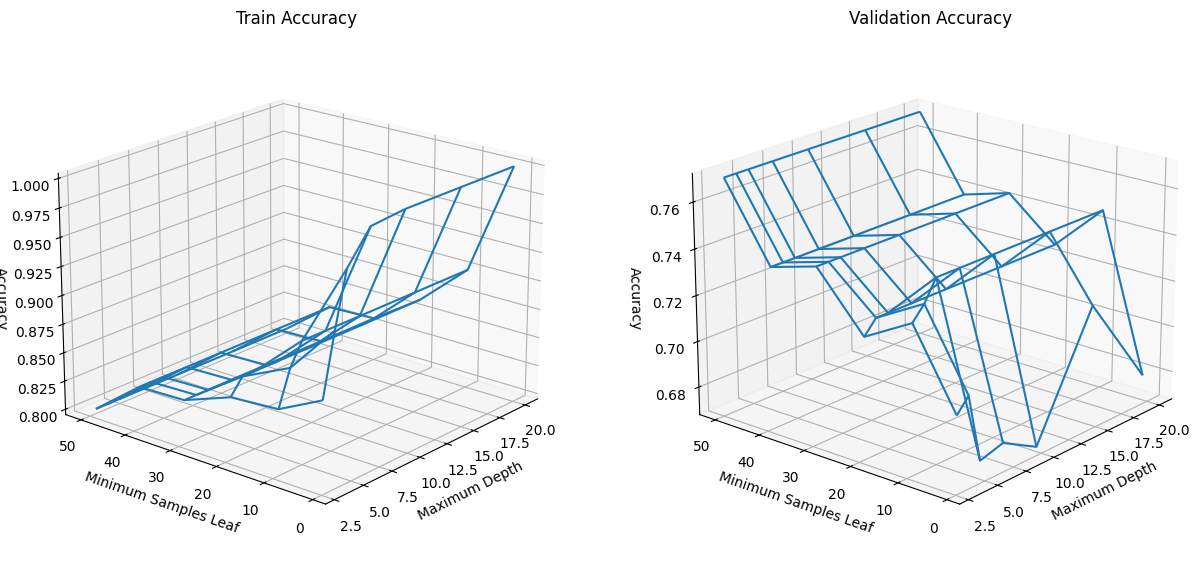

In [10]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
plot_scores(ax1, 'Train Accuracy', search, hyperparameters, 'mean_train_score')
plot_scores(ax2, 'Validation Accuracy', search, hyperparameters, 'mean_test_score')

In [11]:
import scipy.stats

class RandomForest416:
    """
    This class implements the common sklearn model interface (has a fit and predict function).

    A random forest is a collection of decision trees that are trained on random subsets of the
    dataset. When predicting the value for an example, takes a majority vote from the trees.
    """

    def __init__(self, num_trees, max_depth=1, min_samples_leaf=1):
        """
        Constructs a RandomForest416 that uses the given numbner of trees, each with a
        max depth of max_depth.
        """
        self._trees = [
            DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            for i in range(num_trees)
        ]

    def fit(self, X, y):
        """
        Takes an input dataset X and a series of targets y and trains the RandomForest416.

        Each tree will be trained on a random sample of the data that samples the examples
        uniformly at random (with replacement). Each random dataset will have the same number
        of examples as the original dataset, but some examples may be missing or appear more
        than once due to the random sampling with replacement.
        """
        # Q7
        # TODO
        n = len(X)
        for tree in self._trees:
            indices = np.random.randint(0, n, n)
            tree.fit(X.iloc[indices], y.iloc[indices])

    def predict(self, X):
        """
        Takes an input dataset X and returns the predictions for each example in X.
        """
        # Builds up a 2d array with n rows and T columns
        # where n is the number of points to classify and T is the number of trees
        predictions = np.zeros((len(X), len(self._trees))).astype(str)
        for i, tree in enumerate(self._trees):
            # Make predictions using the current tree
            preds = tree.predict(X)

            # Store those predictions in ith column of the 2d array
            predictions[:, i] = preds

        rf_pred = []
        for i in range(len(X)):
            rf_pred.append(Counter(predictions[i,:].tolist()).most_common(1)[0][0])
        # For each row of predictions, find the most frequent label (axis=1 means across columns)
        return rf_pred

In [12]:
rf = RandomForest416(num_trees = 15, max_depth = 20)
rf.fit(train_data[features], train_data[target])

train_pred_rf = rf.predict(train_data[features])
test_pred_rf = rf.predict(test_data[features])

rf_train_accuracy = np.mean(train_pred_rf == np.array(train_data[target]))
rf_test_accuracy = np.mean(test_pred_rf == np.array(test_data[target]))

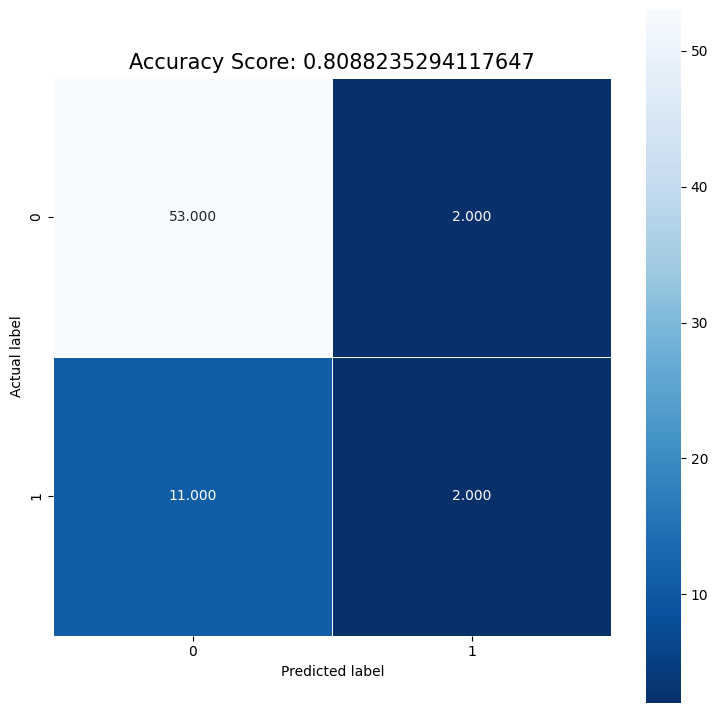

In [13]:
visualize_confusion_matrix(test_data[target], test_pred_rf, rf_test_accuracy)